# Pandas and Numpy

Pandas and Numpy are the two core data libraries for Pandas. This Python notebook documents codesnippets for the loading, cleaning, developing, and testing machine learning models in Pandas, including regression, classification, and deep learning. 



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### Loading the datasets

In [2]:
%%capture
# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv;
bike_data = pd.read_csv('daily-bike-share.csv')

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv;
diabetes = pd.read_csv('diabetes.csv')

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv;
penguins = pd.read_csv('penguins.csv')

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv;
data = pd.read_csv('seeds.csv')

# load the training dataset
!wget https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv
data = pd.read_csv('flights.csv')


### Importing and Creating Datasets 

##### wget and read_csv

You can use the wget! to import a dataset from Github (where wget is a bash command and ! calls bash in a Python notebook), and read_csv to read a csv.

In [3]:
%%capture
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

#### Creating a 1D Numpy Array from a list

In [4]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]

grades = np.array(data) 

#### Create a 2D Numpy Array from two lists

In [5]:
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,23.2,12.5,12.0]

student_data = np.array([study_hours, grades])

#### Create a Pandas Dataframe from three lists

In [6]:
df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

### Dealing with Missing Data 

##### Show the DataFrame as Booleans where there is missing data

In [7]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


##### Show the sum of null values by column

In [8]:
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

##### Show the rows with null values

In [9]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade


##### Fill the null fields with a value

In [10]:
# This line fills a particular column of the dataframe with that dataframe's mean
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students.isnull().head()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


##### Drop nulls from any row with a Null value

In [11]:
df_students = df_students.dropna(axis=0, how='any')
df_students.isnull().head()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


### Initial Exploration 

### Querying by Conditions

#### Find a row by its index

In [12]:
df_students.loc[0:4]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [13]:
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

#### Find a row by index and column

In [14]:
df_students.loc[5,'Grade']

3.0

In [15]:
df_students.loc[1:3,'Grade']

1    50.0
2    47.0
3    97.0
Name: Grade, dtype: float64

#### Find a row by index and condition

In [16]:
df_students.loc[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


#### Filtering a dataframe based on multiple conditions

In [17]:
df_flights = pd.read_csv('flights.csv')
df_flights = df_flights.loc[(df_flights.ARR_DELAY < 400) & (df_flights.DEP_DELAY < 400)]                            

#### Query by column and condition (3 ways)

In [18]:
df_students.query('Name=="Aisha"')
df_students[df_students.Name == 'Aisha']
df_students[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


#### Query sequential rows by ordinal position in a dataframe

In [19]:
df_students.iloc[0:4]

,Name,StudyHours,Grade
0,Dan,10.0,50.0
1,Joann,11.5,50.0
2,Pedro,9.0,47.0
3,Rosie,16.0,97.0


#### Query sequent rows and columns by ordinal position in a dataframe

In [20]:
df_students.iloc[0:4,0:2]

,Name,StudyHours
0,Dan,10.0
1,Joann,11.5
2,Pedro,9.0
3,Rosie,16.0


#### Query nonsequential rows and columns by ordinal position in a dataframe

In [21]:
df_students.iloc[[1,4],[0,2]]

,Name,Grade
1,Joann,50.0
4,Ethan,49.0


#### Filter by a Boolean and find the new mean of a column in that dataframe

In [22]:
mean_study = df_students.StudyHours.mean()
df_students[df_students.StudyHours > mean_study].Grade.mean()


66.7

### DataFrame Manipulation

#### Create Pandas Series based on a condition

In [23]:
passes = pd.Series(df_students['Grade']>=60)
type(passes)
passes.head()

0    False
1    False
2    False
3     True
4    False
Name: Grade, dtype: bool

#### Concatenate that series to an existing Pandas Dataframe

In [24]:
df_students = pd.concat([df_students, passes.rename("Pass")],axis=1) 
df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


#### Show the datatype of a Pandas dataframe and test if a column is a float

In [25]:
print(df_students.dtypes)
df_students.StudyHours.dtypes == 'float64'

Name           object
StudyHours    float64
Grade         float64
Pass             bool
dtype: object


True

#### Add a dataframe to the bottom of another dataframe (and reset the index)

In [26]:
more_students = pd.concat([df_students, df_students.head()],axis=0) 
more_students.reset_index()
more_students = more_students.iloc[:,0:4]
more_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


#### Groupby count

In [27]:
print(df_students.groupby(df_students.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


#### Groupby one column and show the means of two quantitative columns

In [28]:
print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())

       StudyHours      Grade
Pass                        
False        9.53  38.000000
True        14.25  73.142857


/var/folders/x3/d55ycfh10xl3qzrrp818k8xw0000gn/T/ipykernel_63694/2502225861.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())


#### Create a grouped dataframe using one column and get a group from it

In [29]:
gdf = df_students.groupby('Pass') 
gdf.get_group(False).head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False


#### Create a grouped dataframe using two columns  

In [30]:
gdf = df_students.groupby(['Pass','StudyHours'])
gdf.get_group((False, 1))

,Name,StudyHours,Grade,Pass
5,Vicky,1.0,3.0,False


#### Sort 

In [31]:
df_students = df_students.sort_values('Grade', ascending=False)
df_students.head()

,Name,StudyHours,Grade,Pass
3,Rosie,16.0,97.0,True
10,Francesca,15.5,82.0,True
9,Giovanni,14.5,74.0,True
14,Jenny,15.5,70.0,True
21,Aisha,12.0,64.0,True


#### Use Scikit learn to normalize dataframe columns

In [32]:
# Creating a sample of data students where StudyHours are just >1 
df_sample = df_students[df_students['StudyHours']>1]

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

#### Use sklearn to split into features and target, then training and test data

In [33]:
from sklearn.model_selection import train_test_split

X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:3], '\nLabels:', y[:3], sep='\n')
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Features:
[[1.       1.       0.       6.       0.       2.       0.344167 0.363625
  0.805833 0.160446]
 [1.       1.       0.       0.       0.       2.       0.363478 0.353739
  0.696087 0.248539]
 [1.       1.       0.       1.       1.       1.       0.196364 0.189405
  0.437273 0.248309]]

Labels:
[331 131 120]
Training Set: 511 rows
Test Set: 220 rows


#### Separate features and labels for classification

In [34]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

#### Create a new variable, day, from a date variable using datetime

In [35]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


### Basic Summary Statistics

#### Describe numerical columns in a dataframe

In [36]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [37]:
#### Find the mean of a column in Pandas

In [38]:
mean_study = df_students.StudyHours.mean()
mean_grade = df_students.Grade.mean()
mean_study

11.031818181818181

#### Create a Pandas series and find min, max, mean, median, and mode

In [39]:
var = df_students['Grade']
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

#### Show the 1st and 99th percentile of study hours in dataframe df_students

In [40]:
q01 = df_students.StudyHours.quantile(0.01)
q99 = df_students.StudyHours.quantile(0.99)
print('This is the first percentile: {:.2f}\nAnd this is the 99th: {:.2f}'.format(q01, q99))

This is the first percentile: 2.05
And this is the 99th: 21.69


#### Use iterrrows to print through rows in a dataframe

In [41]:
# Display a random sample of 10 observations
sample = penguins.sample(10)
sample
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(3).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 47.3 13.8 216.0 4725.0 1 ] Gentoo
[ 41.0 20.0 203.0 4725.0 0 ] Adelie
[ 40.2 17.0 176.0 3450.0 0 ] Adelie


### Correlation

#### Test the correlation between a variable StudyHours and Grade

In [42]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.668110684836675

### Regression Models 

Loading the data for the Regression notebook, split into train and test 

In [43]:
from sklearn.model_selection import train_test_split

X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

#### Fit a linear regression model on the training set

In [44]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


#### Using linear regression model to create predictions 

In [45]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


#### Plot predicted versus actual rentals over a scatter plot, iwth the regression line overlaid: 

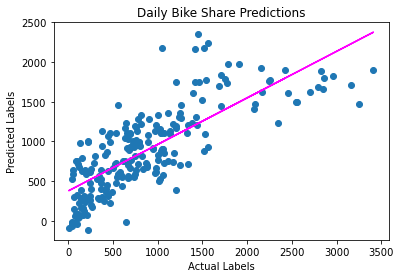

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Show Mean Squared Error (MSE), Root Mean Squared Error, and R2 Score: 

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


#### LASSO regression: Train model, evalute using test data, plot actual versus predicted and regression line overlaid

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


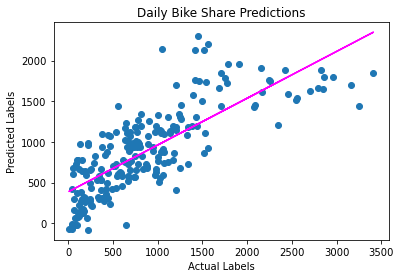

In [48]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Decision Tree: Train model, evaluate, plot predicted versus actual

DecisionTreeRegressor() 

MSE: 246945.16818181818
RMSE: 496.9357787298256
R2: 0.5158794969578404


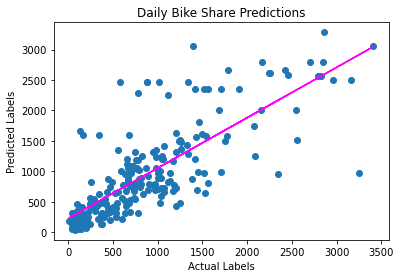

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Gradient Boosting Estimator: Train the model, evaluate, plot predicted versus actual with regression line overlaid

GradientBoostingRegressor() 

MSE: 103861.37751423416
RMSE: 322.2753132249415
R2: 0.7963862881017295


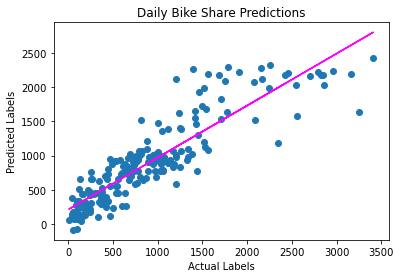

In [50]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Fit a Gradient Boosting model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Try different learning rates and n_estimators (trees) for Gradient Boosting, find the best model using GridSearch, print evaluation, and then plot predicted versus actual with regression line

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 104224.77076978164
RMSE: 322.8386141244285
R2: 0.7956738784321131


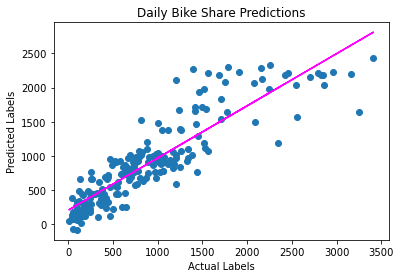

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Gradient Boosting: Create a pipeline that preprocesses data by scaling numeric columns and encoding categorical features as one-hot vectors, then applies a Gradient Boosting Regression and prints the result.

In [52]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


#### Random Forest: Create a pipeline that preprocesses data by scaling numeric columns and encoding categorical features as one-hot vectors, then applies a Gradient Boosting Regression and prints the result.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 103384.1560536364
RMSE: 321.53406670776957
R2: 0.7973218508230742


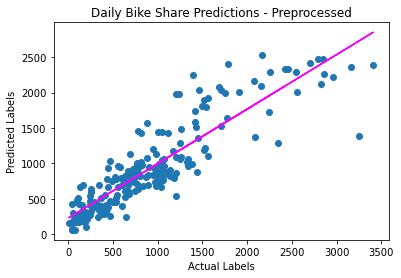

In [53]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Save and reuse a regression model from a .pkl file

In [54]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 110 rentals
New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 110 rentals


### Classification Model - One Class

In [55]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values


In [56]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


#### Train and apply a Logistic Regression model 

In [57]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
# regularization rate of 100 means L2 more prominent, can also set "l1" or "l2"
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

LogisticRegression(C=100.0, solver='liblinear')
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


#### Evaluate logistic regression model, including precision, F1-score

In [58]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

Accuracy:  0.7891111111111111
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



- Precision: Of the predictions the model made for this class, what proportion were correct?

- Recall: Out of all of the instances of this class in the test dataset, how many did the model identify?

- F1-Score: An average metric that takes both precision and recall into account.

- Support: How many instances of this class are there in the test dataset?

#### Show overall precision and recall (important for multiple categories)

In [59]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.723673792557403
Overall Recall: 0.6036988110964333


#### Show confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2637  349]
 [ 600  914]]


#### Make predictions, plot ROC Curve, show AUC

[[0.816695   0.183305  ]
 [0.963139   0.036861  ]
 [0.80891588 0.19108412]
 ...
 [0.60678462 0.39321538]
 [0.10621342 0.89378658]
 [0.63838686 0.36161314]]


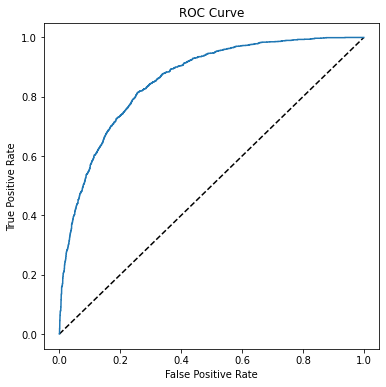

AUC: 0.8568391817030775


In [61]:
y_scores = model.predict_proba(X_test)
print(y_scores)

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

#### Create a pipeline that normalizes and one-hot encodes variables, then show metrics and plot ROC Curve 

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202436115345854


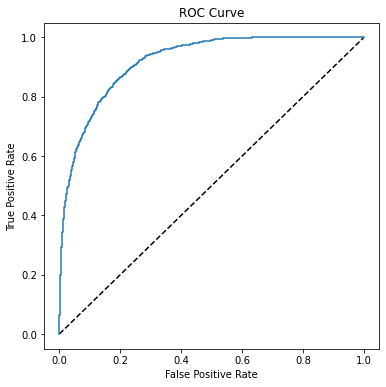

In [62]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
# print (model)

# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Reuse the above Pipeline for Random Forest Classification and go through the same steps

Confusion Matrix:
 [[2858  128]
 [ 177 1337]] 

Accuracy: 0.9322222222222222
Overall Precision: 0.9126279863481229
Overall Recall: 0.8830911492734478

AUC: 0.9822146680103805


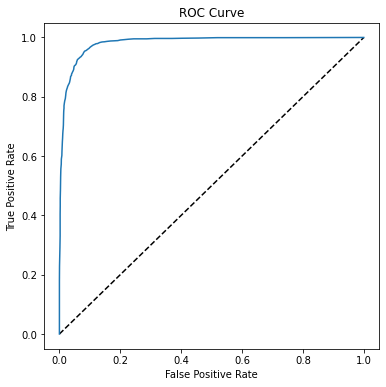

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Save as a .pkl file, apply it, and print new predictions

In [64]:

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


### Classification Model - Multiclass

#### All of the preprocessing steps for a multiclass classification probelm: 

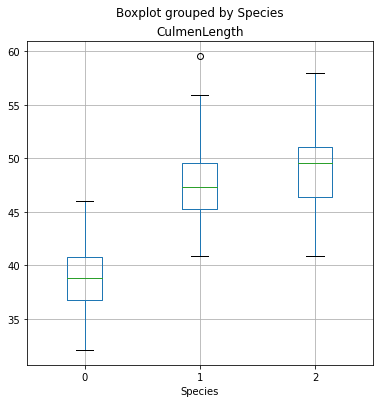

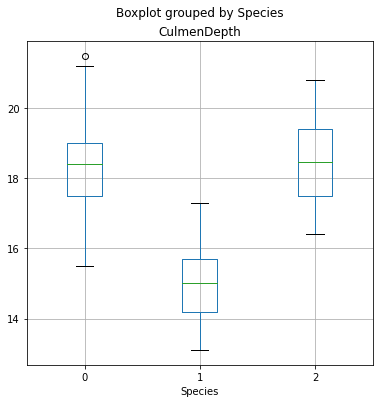

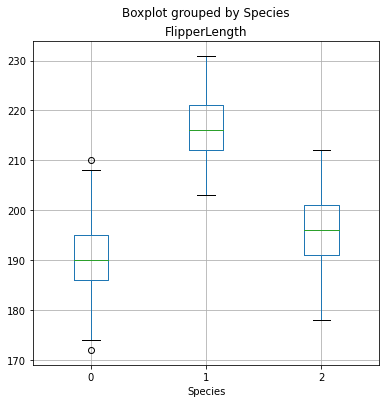

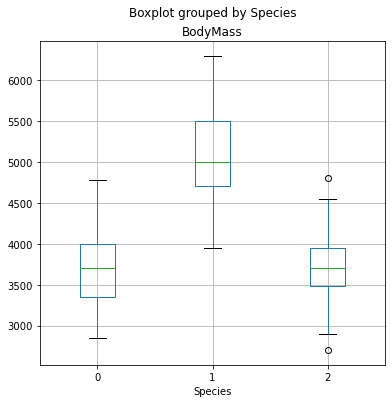

Training Set: 239, Test Set: 103 



In [65]:
# All of the preprocessing steps with the penguins dataset: 
# Count the number of null values for each column
penguins.isnull().sum()
# Show rows containing nulls
penguins[penguins.isnull().any(axis=1)]
# Drop rows containing NaN values
penguins=penguins.dropna()
#Confirm there are now no nulls
penguins.isnull().sum()
from matplotlib import pyplot as plt
%matplotlib inline

# Plot boxplots against labels for each species
penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

#### Train a multi-class logistic regression model on the training set, make predictions, and show metrics

In [66]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Print average AUC
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

LogisticRegression(C=10.0, max_iter=10000)
Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608
[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]
Average AUC: 0.9981999902100828


#### Create a Pipeline for processing, training, and making predictions from a multiclass classification model

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


#### See Visualization section for Heat Map confusion matrix and Multiclass ROC curve

### Clustering Models

In [68]:
# Display a random sample of 10 observations (just the features)
data = pd.read_csv('seeds.csv')
features = data[data.columns[0:6]]
features.sample(3)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
78,18.94,16.49,0.8750,6.445,3.639,5.064
153,11.18,13.04,0.8266,5.220,2.693,3.332
188,11.23,12.82,0.8594,5.089,2.821,7.524


#### Normalize the numeric features and use PCA to get two principle components

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:2]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233]])

#### After PCA, show datapoints on two dimensions: 

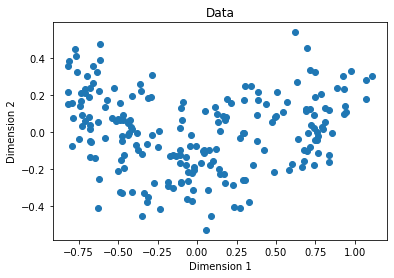

In [70]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

#### Plot Within Cluster Sum of Squares against clusters to estimate optimal number of clusters

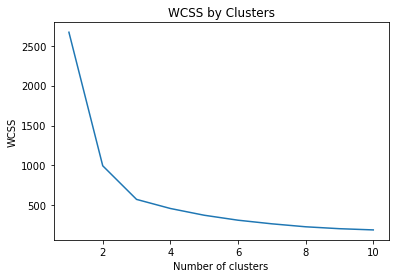

In [71]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Execute and Plot a K-Means clustering algorithm

What are the advantages of K-Means versus hierarchical clustering?

A: K-means requires more assumptions, but hierarchical clustering is much more computationally expensive, and thus less scalable.

In [ ]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

#### Execute and plot a Hierarchical / Agglomerative Clustering Algorithm

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2') 
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)

### Deep Learning Models 

#### Do prework: Import dataset, oversample to increase its size, split into train/test, set datatypes to float and categorical, and set a random seed

#### NOTE: There is an issue with the new versions of Tensorflow and Jupyter that importing tensorflow crashes the notebook. These scripts work well in a regular python script, so I'm going to keep them here for reference, but comment them out so they don't run. 

In [ ]:
%%script false --no-raise-error

import pandas as pd
penguins = pd.read_csv('penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = pd.concat([penguins, penguins], axis = 0)
    
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
#print(sample.columns[0:5].values, 'SpeciesName')
#for index, row in penguins.sample(10).iterrows():
#    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])
    
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

#### Define a classified network with a rectification linear activation function, a hidden layer with ten input nodes, and an output layer with a SoftMax activiation function that predicts penguin species

In [ ]:
%%script false --no-raise-error

# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

#### Train the above model by applying an Adam optimizer to a categorical cross-entropy loss function interatively over 50 epochs

In [ ]:
%%script false --no-raise-error


#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

#### Use matplot to show how the loss increased over iterations: 

In [ ]:
%%script false --no-raise-error

%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

#### Show how the weights changed for each layer: 

In [ ]:
%%script false --no-raise-error

for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    #print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

#### Evaluate model performance by showing a confusion matrix: 

In [ ]:
%%script false --no-raise-error

# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

#### Save the trained neural network as an .h5 file and make predictions

In [ ]:
%%script false --no-raise-error

# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

#### Prepare se a transfer learning algorithm to distinguish between shapes stored as .png files in separate folders by importing the data, showing the different shapes, and splitting into train/test

In [ ]:
%%script false --no-raise-error

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = 'data/shapes'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

#### Define a convolutional netural network with an input layer, max pooling layer, ReLu activation function, SoftMax output layer 

In [ ]:
%%script false --no-raise-error

# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

#### Train the CNN, view the loss history, and evaluate model performance: 

In [ ]:
%%script false --no-raise-error

%%capture
#Train the model over 5 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

In [ ]:
%%script false --no-raise-error

%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

#### Show a confusion matrix, save file, and deploy with a random test image: 

In [ ]:
%%script false --no-raise-error

# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

# Save the trained model
modelFileName = 'models/shape_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

from tensorflow.keras import models
import numpy as np
from random import randint
import os
%matplotlib inline

# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index

# Function to create a random image (of a square, circle, or triangle)
def create_image (size, shape):
    from random import randint
    import numpy as np
    from PIL import Image, ImageDraw
    
    xy1 = randint(10,40)
    xy2 = randint(60,100)
    col = (randint(0,200), randint(0,200), randint(0,200))

    img = Image.new("RGB", size, (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    if shape == 'circle':
        draw.ellipse([(xy1,xy1), (xy2,xy2)], fill=col)
    elif shape == 'triangle':
        draw.polygon([(xy1,xy1), (xy2,xy2), (xy2,xy1)], fill=col)
    else: # square
        draw.rectangle([(xy1,xy1), (xy2,xy2)], fill=col)
    del draw
    
    return np.array(img)

# Create a random test image
classnames = os.listdir(os.path.join('data', 'shapes'))
classnames.sort()
img = create_image ((128,128), classnames[randint(0, len(classnames)-1)])
plt.axis('off')
plt.imshow(img)

# Use the classifier to predict the class
model = models.load_model(modelFileName) # loads the saved model
class_idx = predict_image(model, img)
print (classnames[class_idx])


### Plots and Visualizations 

Okay to review the above, to start:
- import the df_students from Github using wget and read with a .csv
- remove any rows iwth missing data
- Calculate who passed, assuming 60 is neeed to pass
- Added the passes as a column 
- print the result out into the notebook

In [ ]:
%%capture
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

#### Setting the figures to show in the notebook

In [ ]:
%matplotlib inline 

#### Using Matplot, Create a bar plot of two variables, where x is categorical and y is numeric

In [ ]:
#Determine the dimensions of the figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

#### Using Matplot, Create a pie chart of counts

In [ ]:
#Determine the dimensions of the figure
fig = plt.figure(figsize=(8,5))

pass_counts = df_students['Pass'].value_counts()

# Create a bar plot of name vs grade
plt.pie(pass_counts, labels=pass_counts)

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.legend(pass_counts.keys().tolist())

# Display the plot
plt.show()

#### Using Matplot, Create Two Plots side by side: One a bar chart as above, one a pie chart that shows counts of another variable

In [ ]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

#### Using Matplot, create a histogram from a Pandas Series

In [ ]:
var_data = df_students['Grade']
fig = plt.figure(figsize=(10,4))
plt.hist(var_data)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
fig.show()

#### Add axis lines for mean, median, mode, etc. to the above histogram

In [ ]:
var = df_students['Grade']

# Get the statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

#Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add the lines
plt.axvline(x=min_val, color = 'gray', linestyle = 'dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

#### Using Matplot, create a boxplot from a Pandas series

In [ ]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

#### Using Matplot, superimpose the histogram and Box plot on top of one another: 

In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    #print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,med_val,max_val)  
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)
        

#### Using Matplot, show a density diagram from a Pandas series: 

In [ ]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

#### Create a bar chart in one line from the dataframe and set a new label for the y axis

In [ ]:
plot = df_students.plot.bar(x='Name', y ='StudyHours', color = 'teal', figsize=(6,4), title = "Study Hours by Student")
plot.set_ylabel("Study Hours") 
plot

#### Show a distribution of a Pandas series: 

In [ ]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

#### Use SciPy Stats to set a Gaussian distribution for a Pandas Series and annotate 1st, 2nd, and 3rd standard deviations

In [ ]:
import scipy.stats as stats

# Get the grade column from df_students
col = df_students['Grade']

#Get and plot the density 
density = stats.gaussian_kde(col) 

col.plot.density()

#Get the mean and standards deviation
s = col.std()
m = col.mean()

#Annotate 1 stdev

x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color = 'magenta')
plt.annotate('1 std (68.26 %)',  (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

#plt.axis('off')

plt.title("Distribution of Grades")

plt.show()


#### Create a bar plot showing two values side-by-side, in this case, normalized ones

In [ ]:
# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

#### Create a Scatter Plot from a dataframe

In [ ]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

#### Create a histogram from a Pandas dataframe and set bins 

In [ ]:
plot = var.plot.hist(bins=10, alpha=0.5)

#### Loop through numerical features in a dataframe and plot histograms for each, with median and mean axis lines: 

In [ ]:
# Plot a histogram for each numeric feature
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

#### Loop through the categorical features of a dataframe and create a histogram for each

In [ ]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

#### Loop through the numerical features of a dataframe and create scatter plots against the target variable, including correlation in the title

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


#### Loop through the categorical features of a dataframe and create boxplots against a target variable: 

In [ ]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

#### For classification exploration, loop through features and create a boxplot for each category: 

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

#### Show a Confusion Matrix visualization for a multiclass classification problem: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

#### Plot a ROC Curve for each class in a multiclass classification problem


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### For clustering analysis, after PCA, show a plot of the two dimensions: 

In [ ]:
#Load dataset
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

# Appendix: Script with examples for Python code like Class/function generation, __main__, decorators, and logging

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May 21 15:04:52 2022

@author: chriswickham

This file creates a function for each of the 38 Practice 
Problems in Practice Python

"""

"""
These are answers for these 38 Python practice questions: 
    https://www.practicepython.org/
"""


from datetime import date, datetime
import pandas as pd
import logging, coloredlogs
import random
import string
import requests
from bs4 import BeautifulSoup

# WHen you're done with all of these quesitons, you should 
# make sure to do something that explores decorators. 

def question_announcer(func): 
    
    def inner(self): 
        print("%" * 15)
        print("This is the answer to ", func.__name__)
        print("%" * 15)
        func(self)
        
    return inner

class PythonPractice():
    
    def __init__(self): 
        pass

    def question1(self, repeats = 0):
        """
        
        
        Question 1:
        Create a program that asks the user to enter their name and their age. 
        Print out a message addressed to them that tells them the year that they will turn 100 years old. 
        
        Add on to the previous program by asking the user for another number and printing out that many copies of the previous message. 
        (Hint: order of operations exists in Python)
        Print out that many copies of the previous message on separate lines. 
        (Hint: the string "\n is the same as pressing the ENTER button)
        Arguments
        -------
        None, requests a name (str) as input
    
        Returns
        -------
        Prints a message back to the console
    
        """
        logging.info('The answer to Question 1:')
        logging.info('=====================================')
        name = input("Give me your name: ")
        print("Pleasure to meet you, ", name, "!")
        
        age = int(input("What is your age? "))
        
        today = date.today()
        
        year = today.year
        
        target_year = year + (100 - age)
        
        print("You will turn 100 in", target_year, "\n")
        
        if repeats != 0: 
            for repeat in range(repeats): 
                print("You will turn 100 in", target_year,"\n")
    
    @question_announcer
    def question2(self):
        """
        Parameters
        ----------
        None
    
        Returns
        -------
        Prints a message back to the console
        """
        logging.info('The answer to Question 2:')
        logging.info('=====================================')
        number = int(input("What is the first number you choose? "))
        
        if number % 2 == 0: 
            if number % 4 == 0: 
                print("Your number is even and divisble by 4.")
            else: 
                print("Your number is even.")
        else:
            print("Your number is odd.")
        
        num = int(input("What is the second number you choose? "))
        check = int(input("What is the number you want to divide it by? "))
        
        if num % check == 0: 
            print(num, "is divisible by", check)
        else: 
            print(num, "is not divisible by", check, ".")
    
    def question3(self, list): 
        """
        - Take a list of integers and print all less than 5 (do this first
        step in just one line of python).  
        - Return a new list that is those elements of less than 5. 
       
        Parameters
        ----------
        list : list
            A list of numbers
    
        Returns
        -------
        Prints the old and the new list
    
        """
        
        logging.info('The answer to Question 3:')
        logging.info('=====================================')
        #Creating the demo list
        print("This is the list to begin with: \n", list)
        print("This is the list now: \n")
        # list comprehension to create the new list
        newlist = [i for i in list if i<5]
        print(newlist)
        # Establish min and max to be able to filter
        minv = min(list)
        maxv = max(list)
        # Seek input
        new_number = int(input(f'For extra credit, give me a number between {minv} and {maxv}:'))
        # Filter and print the new list 
        newlist2 = [i for i in list if i < new_number]
        print("This is the new list with items less than that number:", newlist2)
    
    def question4(self): 
        """
        Create a program that asks the user for a number and then prints out a list of all the divisors of that number.
        
        Arguments
        -------
        None
    
        Returns
        -------
        Prints a list of divisors for that number
    
        """
        logging.info('The answer to Question 4:')
        logging.info('=====================================')
        num = int(input("Choose a number and we'll determine divisors:"))
        newlist = [i for i in range(1,num+1) if num % i == 0]
        newlist = ' '.join(str(i) for i in newlist)
        print(newlist)
     
    def question5(self):
        """
        Take two lists and write a program that returns a list that contains only 
        the elements that are common between the lists (without duplicates). 
        Make sure your program works on two lists of different sizes.
    
        Extras:
    
        Randomly generate two lists to test this
        
        Returns
        -------
        list1: list
            This is a list of integers
        list2: list
            This is a list of integers
        """    
        logging.info('The answer to Question 5:')
        logging.info('=====================================')
        list1 = []
        list2 = []
        for i in range(random.randint(1,10)): 
            list1.append(random.randint(4,15))
        for i in range(random.randint(1,10)): 
            list2.append(random.randint(1,10))
            
        newlist = [i for i in list1 if i in list2]
        print("This is the first randomly generated list: \n", list1)
        print("This is the second randomly generated list: \n", list2)   
        print("This is the list of overlapping items: \n", newlist)
        
    def question6(self): 
        """
        Ask the user for a string and print out whether this string is a palindrome or not. 
        (A palindrome is a string that reads the same forwards and backwards.)
    
        Returns
        -------
        None.
    
        """
        logging.info('The answer to Question 6:')
        logging.info('=====================================')
        string = input("What word should be try to see if it's a palindrome:")
        string2 = string[::-1]
        if string == string2: 
            print(string, " is a palindrome.")
        else: 
            print(string, " is not a palindrome.")
            
        # Note, when you're slicing strings, the first argument is where you start, 
        # The second argument is where you end, and the third shows the direction and/or
        # steps, where negative means backwards
        # Related see these, where you can count by steps (but don't include the last item):
        # 
        #   a = [5, 10, 15, 20, 25, 30, 35, 40]
        #   a[1:5:2]
        #   >>> [10, 20]
        #   a[3:0:-1]
        #   >>> [15, 10, 5]
        
    def question7(self,list): 
        """
        Let’s say I give you a list saved in a variable: 
            a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]. 
        Write one line of Python that takes this list a and makes a new list that has only the even elements of this list in it.
    
        Returns
        -------
        None.
    
        """
        logging.info('The answer to Question 7:')
        logging.info('=====================================')
        print("This is the original list for question 7: \n", list)
        newlist = [i for i in list if i % 2 == 0]
        print("This is the list with only  even numbers:\n", newlist)
    
    def quit_protocol(self): 
        """
        This is a function that supports the question8 by providing options
        for quitting the game.
    
        Returns
        -------
        Options for quitting rock paper scissors and soliciting input. 
    
        """
        quit = input("Would you like to play again? Type yes or no.")
        if quit == "yes": 
            question8() 
        elif quit == "no":
            print("Thanks for playing!")
            exit()
        
    def rps_protocol(self): 
        """
        
    
        Parameters
        ----------
        plr2 : str
            The answer for player 1: rock, paper, or scissers
        plr1 : str
            The answer for playe r2: rock, paper, or scissors
    
        Returns
        -------
        prints results to the console
    
        """
        tie = "It's a tie"
        plr1 = "Player 1 Wins!"
        plr2 = "Player 2 Wins!"
        player1 = input("Player 1, rock, paper, or scissors?").lower()
        player2 = input("Player 2, rock, paper, or scissors?").lower()
        if player1 == "rock": 
            if player2 == "rock": 
                print(tie)
            if player2 == "scissors" :
                print(plr1)
            if player2 == "paper":
                print(plr2)
        elif player1 == "scissors": 
            if player2 == "rock": 
                print(plr2)
            if player2 == "scissors" :
                print(tie)
            if player2 == "paper":
                print(plr1)
        elif player1 == "paper": 
            if player2 == "rock": 
                print(plr1)
            if player2 == "scissors" :
                print(plr2)
            if player2 == "paper":
                print(tie)
        if player1 not in ["rock", "scissors", "paper"] or player2 not in ["rock", "scissors", "paper"]:         
                answer = input("The viable options are rock, paper, or scissors. Did you choose one of those?")
                if answer == "yes":
                    print("LIAR")
                if answer == "no":
                    quit_protocol()
                    
        # Note: Return jumps you up a level, exit() completely stops the program running, break breaks and while loops
    
    def question8(self): 
        """
        Make a two-player Rock-Paper-Scissors game.
        
        Arguments: 
            None (takes user input strings, Rock, Paper, or Scissors)
        
        Returns: 
            None (prints game output to console)
        """
        logging.info('The answer to Question 8:')
        logging.info('=====================================')
        logging.info('Rock-Paper-Scissors commence!')
        
        # Play the game
        self.rps_protocol()
        
        #Determine whether to play again
        self.quit_protocol()
    
    def question9(self): 
        """
        Generate a random number between 1 and 9 (including 1 and 9). Ask the user to guess the number, 
        then tell them whether they guessed too low, too high, or exactly right. 
        (Hint: remember to use the user input lessons from the very first exercise)
        Keep the game going until the user types “exit”
        Keep track of how many guesses the user has taken, and when the game ends, print this out.
        
        Arguments: 
            None
        Returns: 
            None
        """
        logging.info('The answer to Question 9:')
        logging.info('=====================================')
        logging.info('Let the guessing game commence!')
        
        num = random.randint(1,9)
        num_guess = 0
        
        guess = int(input("Guess a number between 1 and 9."))
        while num != guess: 
            if guess < num: 
                print("The guess was too low.") 
                num_guess += 1
                guess = int(input("What's your new guess?"))
            elif guess > num: 
                print("Your guess was too high.")
                num_guess += 1
                guess = int(input("What's your new guess?"))
            
        print("You got it right!")
        
        quit = input("Would you like to play again? Type yes or no.")
        if quit == "yes": 
            question9() 
        elif quit == "no":
            print("Thanks for playing!")
            exit()    
            
    # Not doing a question 10 because I solved using a list comprehension in question 7
    
    def question11(self): 
        """
        Ask the user for a number and determine whether the number is prime or not.
        
        Arguments: 
            None, takes user input
            
        Returns: 
            None, prints whether the number is prime or not
        """
        
        logging.info('The answer to Question 11:')
        logging.info('=====================================')
        num = int(input("Choose a number and we'll determine whether it's prime:"))
        newlist = [i for i in range(1,num+1) if num % i == 0]
        if len(newlist) != 2: 
            print("This number is not prime.")
        else: 
            print("This number is prime.")
            
    def question12(self, list): 
        """
        Write a program that takes a list of numbers (for example, a = [5, 10, 15, 20, 25]) 
        and makes a new list of only the first and last elements of the given list. 
        For practice, write this code inside a function.
        
        Arguments
        -------
        list: list 
            A list of numbers
        
        Returns
        -------
        newlist: list 
            A new list consisting of only the first and last elements of the given list
        """
        logging.info('The answer to Question 12:')
        logging.info('=====================================')
        print("This is the original list: \n", list)
        newlist = [list[0], list[len(list)-1]]
        print("This is the new list: \n", newlist)
        
    def question13(self): 
        """
        Write a program that asks the user how many Fibonnaci numbers to generate and then generates them. 
        
        Arguments: 
            None, asks user to enter in number of Fibbonacci to generate
        
        Returns: 
            none, prints to the console
        """
        logging.info('The answer to Question 13:')
        logging.info('=====================================')
        count = int(input("How far along on the Fibonnacci sequence would you like to count? "))
        list = [0,1]
        if count == 1: 
            print("This is the Fibonnaci seqeunce :", list[0])
        elif count == 2: 
            print("This is the Fibonnaci seqeunce :", list)
        else: 
            iter =  0
            while iter != count: 
                newnum = list[-1] + list[-2]
                list.append(newnum)
                iter += 1
            print("This is the Fibbonacci sequence: ", list[:-1])
            
    def question14(self, list):
        """
            Write a program (function!) that takes a list and returns a new list that contains all the elements of the first list minus all the duplicates.
            Extras:
            Write two different functions to do this - one using a loop and constructing a list, and another using sets.
            Go back and do Exercise 5 using sets, and write the solution for that in a different function.
            
            Arguments
            -------
            list: list
                A list from which to remove duplicates
            Returns: 
            --------
            newlist: list 
                The list with duplicates removed
            newset: set
                A set of the list with duplicates removed
                
        """

        print("For question 14, this is the original list: \n", list)
        newlist = []
        for i in list: 
            if i not in newlist: 
                newlist.append(i)
        
        print("For question 14, this is the new list: \n", newlist)
        
        newset = set(list)
        
        print("For question 14, this is the solution using a set: \n", newset)
        
        return(newlist, newset)
        
        
    # A few notes: 
    #     Sets are not ordered. This means that there is no “first element” or “last element.” There are just “elements”. You cannot ask a set for it’s “next element”.
    #     There are no repeat elements in sets.
    #     You can convert between sets and lists very easily.
        
    def question15(self): 
        """
        Write a program (using functions!) that asks the user for a long string containing multiple words. 
        Print back to the user the same string, except with the words in backwards order. 
        
        Arguments: 
            None, user input

        Returns
            None, prints output to terminal 
        """
        sentence = input("Give a sentence to reverse order: ")
        sentlist = sentence.split(" ")
        newsentencelist = sentlist[::-1]
        newsentence = ' '.join(newsentencelist)
        
        print("This is your new sentence: ", newsentence)
        
    def question16(self): 
        """
        Write a password generator in Python. Be creative with how you generate passwords - 
        strong passwords have a mix of lowercase letters, uppercase letters, numbers, and symbols. 
        The passwords should be random, generating a new password every time the user asks for a new password.
        Include your run-time code in a main method.
        Extra:
        Ask the user how strong they want their password to be. For weak passwords, pick a word or two from a list.

        Arguments
        -------
        None (asks for user input)

        Returns
        -------
        Password: str
            A password which is either strong or weak, based on user input
        """
        upper_string = string.ascii_uppercase
        lower_string = string.ascii_lowercase
        special_characters = ['~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']
        master_list = [upper_string, lower_string, special_characters]
        weak_words = ["orange", "yellow", "blue", "green", "red", "indigo"]
        
        weakstrong = input("Do you want a weak password or a strong one? " )
        if weakstrong == "weak": 
            num = random.randint(0,5)
            password = weak_words[num]
            password = ''.join(password)
            print("Your new password is: ", password)
            return(password)
        elif weakstrong == "strong": 
            password = []
            num = random.randint(10,20)
            iter = 0 
            while iter != num: 
                source_num = random.randint(0,2)
                character_num = random.randint(0,25)
                password.append(master_list[source_num][character_num])
                iter += 1
        password = ''.join(password)
        print("Your new password is: ", password)
        return(password)
    
    def question17(self): 
        """
        Arguments: 
        -------
            None, input

        Returns
        -------
            None (prints output to terminal)

        """
        url = "https://www.nytimes.com/"
        print("We'll be pinging this URL: \n", url)
        r = requests.get(url)
        print("This was the result of a get request: \n", r)
        r_html = r.text
        print("This is the html text: \n", r_html)
        soup = BeautifulSoup(r_html)
        title = soup.find("title")
        print("These are the titles of the homepage: \n", title)
        
    def question18(self): 
        """
        
        """
        print("Welcome to the cows and bulls game!")
        num = random.randint(1000,9999)
        print("Chris - the number is ", num)
        num = str(num)
        guess = input("What is your guess for a four digit number?")
        if len(guess) != 4: 
            guess = input("What is your next guess for a *four* digit number?")
        while guess != num: 
            cows = 0
            bulls = 0
            for i in range(0,4):
                if guess[i] == num[i]: 
                    cows += 1
                elif guess[i] in num: 
                    bulls+=1
            print("You have ",cows, "cows and ", bulls, " bulls. Try again!")
            guess = input("What is your next guess for a four digit number?")
            if len(guess) != 4: 
                guess = input("What is your next guess for a *four* digit number?")
        print("You got it right!" )
                
        
def main(): 
    print("You've executed the main function! See the following script for how one might instantiate a class, call individual functions, and test performance time.")

if __name__ == "__main__":
    main()

In [ ]:
%%script false --no-raise-error

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 22 12:20:03 2022

@author: chriswickham
"""

from datetime import date, datetime
import pandas as pd
import logging, coloredlogs
import random
import time

from PythonPractice38Questions import PythonPractice 
# question1 = PythonPractice.question1()

if __name__ == "__main__": 
    start_time = time.time()
    coloredlogs.install()
    # logging.info('Get ready for answers to all of your questions')
    # logging.info('=====================================')
    # Setting demo variables 
    list = [1,2,3,4,5,6,7,8,9,10, 10]
    # Initiating the pythonPractice class
    # practicesesh = PythonPractice()
    # practicesesh.question1()
    #practicesesh.question2()
    # practicesesh.question3(list)
    # practicesesh.question4()
    # practicesesh.question5()
    # practicesesh.question6()
    # practicesesh.question7(list)
    # practicesesh. question8()
    # practicesesh.question9()
    # Not doing question 10 since I already solved in question 7
    # practicesesh.question11()
    # practicesesh.question12(list)
    # practicesesh.question13()
    # practicesesh.question14(list)
    # practicesesh.question15()
    # practicesesh.question16()
    # practicesesh.question17()
    # practicesesh.question18()

    print("--- %s seconds ---" % (time.time() - start_time))